# Lab exercise 2: Regression, Least squares, QR 

## Part 1: Dealing with polynomials in Python

_**Curve fitting**, i.e. fitting mathematical functions to observed data, is common in many application areas ranging from medicine to digital images. In this part of the lab, you will learn how **polynomials** are represented in Python and get familiar with some basic **polynomial operations**. Then, in the next part of the lab, you will work with a real application where curve fitting is
used._

### Polynomial Representations

The basic problem in **polynomial curve fitting** is that there exists a (often very big) dataset
originating from a measurement of some kind, and you would like to describe that dataset as a mathematical function. For example, it might be interesting to see if there is an underlying trend
in the data, or to estimate values in-between the observed data points. Since polynomial curve fitting is based on polynomials, you first need to know how
to work with polynomials in general. In this lab, we will use **NumPy** to deal with polynomials in Python. Using NumPy, polynomials can be created, manipulated and fitted using the `numpy.polynomial` package. 

_1.1 a) Using the numpy.polynomial package, we can create a polynomial object directly from coefficients. Import the numpy.polynomial package by running the cell below. We will also import numpy and matplotlib.pyplot for later use._

In [2]:
from numpy.polynomial import Polynomial
import numpy as np
import matplotlib.pyplot as plt

_1.1 b) In the following cell you will find a code snippet defining three different polynomials by its coefficients. Which are the polynomials that are represented in **$p_A$**, **$p_B$** and **$p_C$**?_ 

Hint: You can view a mathematical expression of a polynomial defined by its coefficients by printing or executing the polynomial object.


In [3]:
pA = Polynomial([1,2,3])
pB = Polynomial([5,4,1])
pC = Polynomial([1, 1])

In [5]:
pA, pB, pC

(Polynomial([1., 2., 3.], domain=[-1,  1], window=[-1,  1], symbol='x'),
 Polynomial([5., 4., 1.], domain=[-1,  1], window=[-1,  1], symbol='x'),
 Polynomial([1., 1.], domain=[-1,  1], window=[-1,  1], symbol='x'))

_1.2) Make sure you understand how to represent a polynomial by its coefficients. In the remainder of this lab, we will use two particular polynomials, namely: $p_1 = 2x^3 + 3x^2 - 1$ and $p_2 = 3x^2 + x - 2$.  Define two polynomial objects representing these polynomials in the cell below. Print the polynomial to verify that your implementation is correct._ 

In [10]:
p1 = Polynomial([-1,0,3,2])
p2 = Polynomial([-2,1,3])

In [11]:
print(p1)

-1.0 + 0.0·x + 3.0·x² + 2.0·x³


In [9]:
print(p2)

-2.0 + 1.0·x + 3.0·x²


When you define a polynomial in this way, there are a number of functions available that can be applied to the polynomial, for example to perform algebraic and arithmetic operations as well as integration and differentiation. Use the documentation (_see https://numpy.org/doc/stable/reference/routines.polynomials.classes.html)_ to see how what commands are available and how to use them. We will take a closer look at a few of them now.

_1.3) a) By calling `r = p.roots()` we can find the **roots** of the polynomial $p$ and store them in a new variable **r**. Compute the roots to your polynomials ($p_1$ and $p_2$). Store the roots in
appropriate variables, for example $r_1$ and $r_2$, respectively. What are the roots?_

_b) Compute the roots of the polynomial $q = x^3 - x^2 +x - 1$. What are they?_

In [17]:
r1 = p1.roots()
r2 = p2.roots()

In [18]:
r1, r2

(array([-1.00000002, -0.99999998,  0.5       ]),
 array([-1.        ,  0.66666667]))

In [19]:
q = Polynomial([-1,1,-1,1])
q.roots()

array([2.49800181e-16-1.j, 2.49800181e-16+1.j, 1.00000000e+00+0.j])

_1.4) By calling `p.deriv(1)` we can find the first derivative of the polynomial $p$. Calculate the derivative of your polynomials ($p_1$ and $p_2$), and store the results in
appropriate variables, for example $derivative_1$ and $derivative_2$, respectively. Convince
yourself that the derivatives are correct by comparing the results to the analytic solutions)._

In [20]:
derivative1 = p1.deriv(1)
derivative2 = p2.deriv(1)

In [23]:
derivative1

Polynomial([0., 6., 6.], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

In [24]:
derivative2

Polynomial([1., 6.], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

_1.5) How do you calculate the 2nd derivative? Figure out how to do it, and then
calculate the 2nd derivatives of the two polynomials._

In [25]:
derivative1 = p1.deriv(2)
derivative2 = p2.deriv(2)

In [26]:
derivative1

Polynomial([ 6., 12.], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

In [27]:
derivative2

Polynomial([6.], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

_1.6) Polynomials constructed in this way are very easy to evaluate in a certain point, or in a number of points at the same time. You can obtain the value of a polynomial `p` at a point `x` by simply calling `p(x)`. Evalute the polynomials $p_1$ and $p_2$ at the point $x=-2$_

In [28]:
p1(-2), p2(-2)

(-5.0, 8.0)

_1.7) Repeat the previous task, but this time evalute the polynomial $p_1$ at the points $x = [-2, -1, 0, 1, 2]$ at the same time. Then, evaluate the polynomial $p_2$ at 10 points spread out evenly between the points -2 and 2._

Hint: You can define a vector containing all the points at which you want to evaluate the polynomial in two different ways. You can define the array directly as in `x = np.array([-2.0, -1.0, 0.0, 1.0, 2.0])` OR `x = np.arange(-2, 3, 1)` (which creates a vector that starts at -2 and takes steps of 1 until it reaches 3) OR `np.linspace(-2.0, 2.0, N)` (which creates a vector containing $N$ points evenly spread out over the interval $[-2, 2]$). **Play around with all of the commands and print the results to understand how to use each of them.**

In [29]:
x = np.array([-2.0, -1.0, 0.0, 1.0, 2.0])

In [31]:
p1(x), p2(x)

(array([-5.,  0., -1.,  4., 27.]), array([ 8.,  0., -2.,  2., 12.]))

In [33]:
x = np.linspace(-2.0, 2.0, 10)

In [34]:
p1(x), p2(x)

(array([-5.        , -1.26886145, -0.03978052, -0.25925926, -0.87379973,
        -0.82990398,  0.92592593,  5.44718793, 13.78737997, 27.        ]),
 array([ 8.00000000e+00,  3.70370370e+00,  5.92592593e-01, -1.33333333e+00,
        -2.07407407e+00, -1.62962963e+00, -6.66133815e-16,  2.81481481e+00,
         6.81481481e+00,  1.20000000e+01]))

_1.8) Plot the polynomials $p_1$ and $p_2$ on the interval $[-2, 2]$. Do this by first constructing a vector `x` containing `N=10` points evenly spread out over the interval, and evaluate the polynomials in these points. Store the result in separate variables `y_1` and `y_2`. You can then plot the polynomial using the command `plt.plot(x,y)`. Finally, improve the plot by adding  a descriptive plot title and labels on each axis. You can do this using the commands `plt.title('your title')`, `plt.xlabel('your label')` and `plt.ylabel('your label')` with appropriate strings._

Hint: You can create separate plots by separating the plot-commands with the command `plt.figure(i)`, where `i` denotes an index of the current figure. You can annotate the plot by adding the label-argument to the plot command, e.g. `plt.plot(x,y, label='p1')`, followed by the command `plt.legend()`. Have a look at the documentation (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) for more suggestions on how to customize your plots. 

In [35]:
x = np.linspace(-2.0, 2.0, 10)
y1 = p1(x)
y2 = p2(x)

Text(0, 0.5, 'your label')

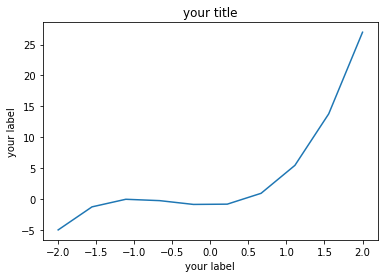

In [36]:
plt.plot(x,y1)
plt.title('your title')
plt.xlabel('your label')
plt.ylabel('your label')

Text(0, 0.5, 'your label')

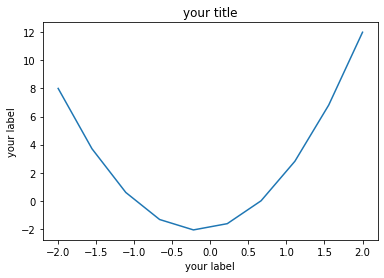

In [37]:
plt.plot(x,y2)
plt.title('your title')
plt.xlabel('your label')
plt.ylabel('your label')

_1.9) Inspect the plot you produced in task 1.8). You may notice that it looks a little ragged. Why? Plot the polynomials again, but this time using $N=200$ points. Is the result better?_

In [39]:
x = np.linspace(-2.0, 2.0, 2000)
y1 = p1(x)
y2 = p2(x)

Text(0, 0.5, 'your label')

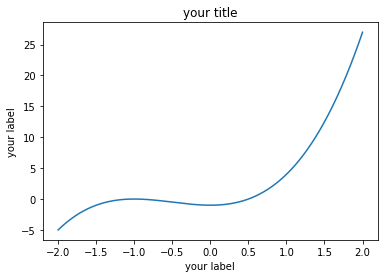

In [40]:
plt.plot(x,y1)
plt.title('your title')
plt.xlabel('your label')
plt.ylabel('your label')

_1.10) Compare the roots you can find in the plot you produced in task 1.9) to the roots you calculated in task 1.3). Do they coincide?_

_1.11) As you can see from the plot of $p_2$, there exists an extremum
somewhere between $x=-0.5$ and $x=0$. How can you calculate that extremum more
exactly using the commands you have learned in this lab? Calculate the exact value in the cell below._

In [45]:
# check for the roots in this interval also is fine
p = Polynomial([-2,1,3])
derivative = p.deriv(1)
derivative.roots()

array([-0.16666667])